In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

######## Ignore Warnings ########
import warnings
warnings.filterwarnings('ignore')
#################################

In [4]:
#import dataset
nyc_df=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [5]:
# Shows number of rows and columns
nyc_df.shape

(18774870, 41)

In [6]:
nyc_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [7]:
# Shows first 5 rows
nyc_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,40007394,08/14/2018 11:13:00 AM,08/14/2018 11:13:00 AM,DOT,Department of Transportation,Street Light Condition,Foreign Attachment On Lamppost,NaN,11216,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.680636,-73.940475,"(40.680635830773596, -73.94047476226626)"
1,39515154,06/20/2018 12:55:00 PM,06/20/2018 12:55:00 PM,DOT,Department of Transportation,Street Light Condition,Fixture/Luminaire Out Of Position,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40344887,09/21/2018 12:15:00 PM,09/24/2018 12:00:00 PM,DSNY,A - Brooklyn,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,11211,626 DRIGGS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.715296,-73.958321,"(40.7152963665797, -73.95832148908224)"
3,39733728,07/14/2018 08:14:00 PM,07/17/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,10312,673 ANNADALE ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.545673,-74.175624,"(40.54567347319745, -74.17562449777785)"
4,39733727,07/14/2018 10:04:00 PM,07/18/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,10473,417 TAYLOR AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.813477,-73.861132,"(40.81347653936673, -73.8611315538063)"


In [8]:
# unique values in a column
nyc_df["Descriptor"].unique()

array(['Foreign Attachment On Lamppost',
       'Fixture/Luminaire Out Of Position', 'E3 Dirty Sidewalk', ...,
       'Explosive/Weapons of Mass Destruction',
       'Industrial Laundry Delivery License Application',
       'Personal Injury'], dtype=object)

In [9]:
#Display Complaint and city together
nyc_complaintandcity=pd.DataFrame(nyc_df[['Complaint Type','City']])
nyc_complaintandcity


,Complaint Type,City
0,Street Light Condition,BROOKLYN
1,Street Light Condition,NaN
2,Dirty Conditions,BROOKLYN
3,Request Large Bulky Item Collection,STATEN ISLAND
4,Request Large Bulky Item Collection,BRONX
5,HEAT/HOT WATER,BRONX
6,Water Conservation,BRONX
7,Dirty Conditions,Jamaica
8,PAINT/PLASTER,NEW YORK
9,ELECTRIC,Woodhaven


In [10]:
nyc_complaintandcity.groupby(['Complaint Type','City']).size()

Complaint Type           City               
AGENCY                   Arverne                    1
                         BRONX                      3
                         BROOKLYN                   1
                         Jamaica                    1
                         NEW YORK                   2
APPLIANCE                ARVERNE                  128
                         ASTORIA                  261
                         Arverne                  192
                         Astoria                  541
                         BAYSIDE                   19
                         BELLEROSE                 14
                         BRONX                  33008
                         BROOKLYN               32628
                         Bayside                   63
                         Bellerose                 16
                         Breezy Point               2
                         CAMBRIA HEIGHTS           19
                         COLLEGE POIN

In [11]:
#displaying Type of complaint, it's Descriptor and city wise count of those complaints
nyc_df.groupby(["Complaint Type","Descriptor","City"]).size()

Complaint Type           Descriptor                     City               
AGENCY                   HOUSING QUALITY STANDARDS      Arverne                 1
                                                        BRONX                   3
                                                        BROOKLYN                1
                                                        Jamaica                 1
                                                        NEW YORK                2
APPLIANCE                AIR-CONDITIONER                ASTORIA                 2
                                                        Arverne                 1
                                                        BELLEROSE               1
                                                        BRONX                  40
                                                        BROOKLYN               80
                                                        COLLEGE POINT           2
                      

In [12]:
#total Complaint Count
totalcomplaintcount=pd.DataFrame(nyc_complaintandcity['Complaint Type'].value_counts())
totalcomplaintcount

,Complaint Type
Noise - Residential,1531114
HEAT/HOT WATER,934010
HEATING,887869
Street Condition,861569
Street Light Condition,830378
Blocked Driveway,750517
Illegal Parking,681520
PLUMBING,660755
Water System,571865
GENERAL CONSTRUCTION,500863


In [13]:
#displaying top 10 complaints
totalcomplaintcount.head(10)

,Complaint Type
Noise - Residential,1531114
HEAT/HOT WATER,934010
HEATING,887869
Street Condition,861569
Street Light Condition,830378
Blocked Driveway,750517
Illegal Parking,681520
PLUMBING,660755
Water System,571865
GENERAL CONSTRUCTION,500863


<Figure size 720x576 with 0 Axes>

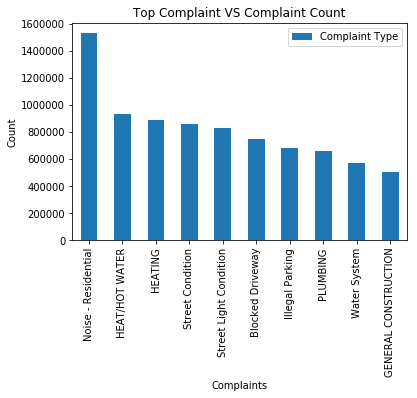

In [14]:
#bar graph showing top complaints vs their count
plt.figure(figsize=(10,8))
totalcomplaintcount.head(10).plot(kind='bar')
plt.title('Top Complaint VS Complaint Count')
plt.xlabel('Complaints')
plt.ylabel('Count')
plt.show()

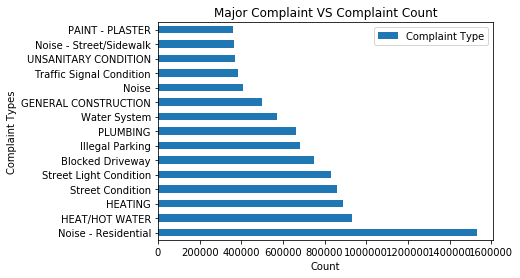

In [15]:
#horizontal bar graph showing major 15 complaint types and their count
totalcomplaintcount.head(15).plot(kind='barh')
plt.title('Major Complaint VS Complaint Count')
plt.xlabel('Count')
plt.ylabel('Complaint Types')
plt.show()

In [16]:
mc=nyc_df.groupby('Complaint Type')
sortedComplainttype=mc.size().sort_values(ascending=False)
sortedComplainttype=sortedComplainttype.to_frame('count').reset_index()
sortedComplainttype

,Complaint Type,count
0,Noise - Residential,1531114
1,HEAT/HOT WATER,934010
2,HEATING,887869
3,Street Condition,861569
4,Street Light Condition,830378
5,Blocked Driveway,750517
6,Illegal Parking,681520
7,PLUMBING,660755
8,Water System,571865
9,GENERAL CONSTRUCTION,500863


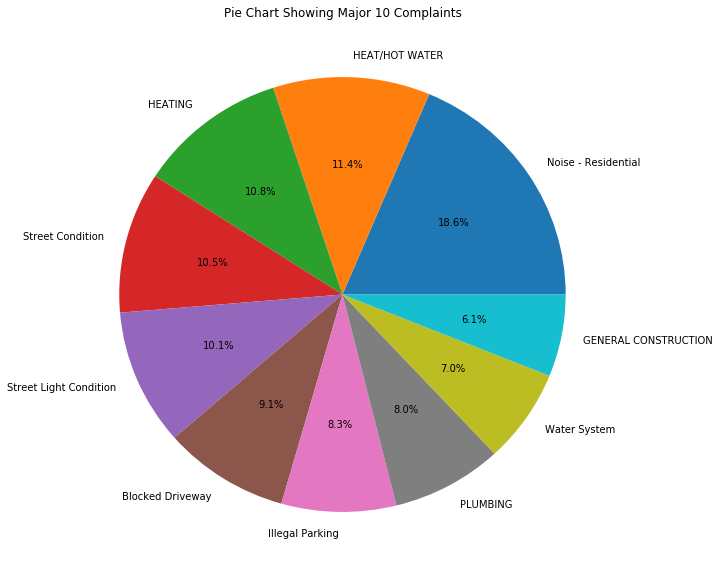

In [17]:
sortedComplainttype=sortedComplainttype.head(10)
plt.figure(figsize=(10,10))
plt.pie(sortedComplainttype['count'],labels=sortedComplainttype["Complaint Type"],autopct="%1.1f%%")
plt.title('Pie Chart Showing Major 10 Complaints')
plt.show()